## About the Dataset 

### Context
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recording to match the format in the book.

In this dataset we are going to do some exploratory analysis to understand what characteristics are related to the increase of price in health treatments. 

### Columns

- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
- objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

### Acknowledgments
- The dataset is available on GitHub here: https://github.com/stedy/Machine-Learning-with-R-datasets

### Goal
- Can you accurately predict insurance costs?
- Perform an exploratory analysis to the data frame and predict the health care expenses using Linear Regression 


In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

In [24]:
#Import the data 

df = pd.read_csv("insurance.csv")

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#Check types to see which columns are numerical and which ones are categorical 

df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
#Search for missing Values and count them for each column 

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
#I will make a copy of the dataframe so we can do some exploratory analysis with the original df

df2 = df.copy()

In [6]:
#Let's convert our categories into numeric using pandas, we could be using One-Hot encoding for this task, but in this scenario it won't affect the results 

cols = ["sex", "smoker", "region"]

df[cols] =df[cols].astype("category")

df["sex"] = df["sex"].cat.codes
df["smoker"] = df["smoker"].cat.codes
df["region"] = df["region"].cat.codes


df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [7]:
#All categorical columns have been converted to numerical 

df.dtypes

age           int64
sex            int8
bmi         float64
children      int64
smoker         int8
region         int8
charges     float64
dtype: object

In [8]:
#Let's check the correlation between our variables and the target 

df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

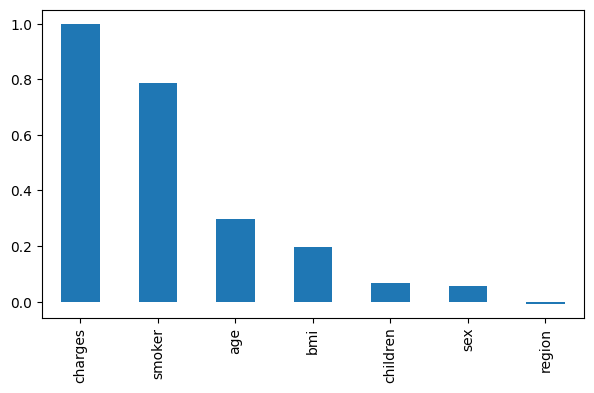

In [9]:
plt.figure(figsize=(7,4))
df.corr()['charges'].sort_values(ascending = False).plot(kind='bar')

### Insight 

- Here we can see that smoking has a strong correlation to the price of treatment, along with age and BMI. It was expected that age would have a strong correlation to the treatment cost but what is surprising here is that the body max index, which measures if a person is overweight is not as correlated as I would expect. We often hear that being overweight is very bed for your health. 


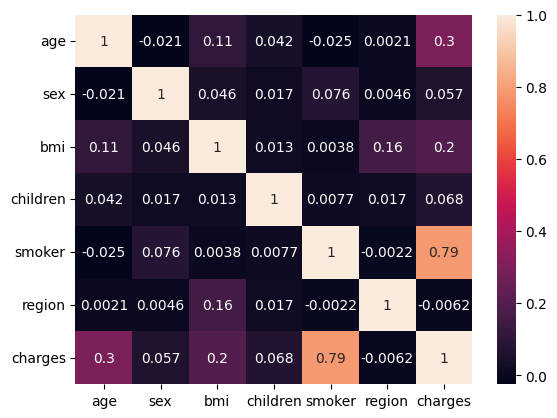

In [10]:
sns.heatmap(df.corr(),annot=True)

plt.show()

As expected the main aggravators to insurance cost are Smoking, Age and BMI. These variables have a small correlation between each other. We could explore more about sex and smoking, region and smoking and so on, but I believe this dataset will not bring enough insights about these characteristics. 

Now let's explore the distribution of charges. This will help us to understand how much most of the patients are spending with their treatment 


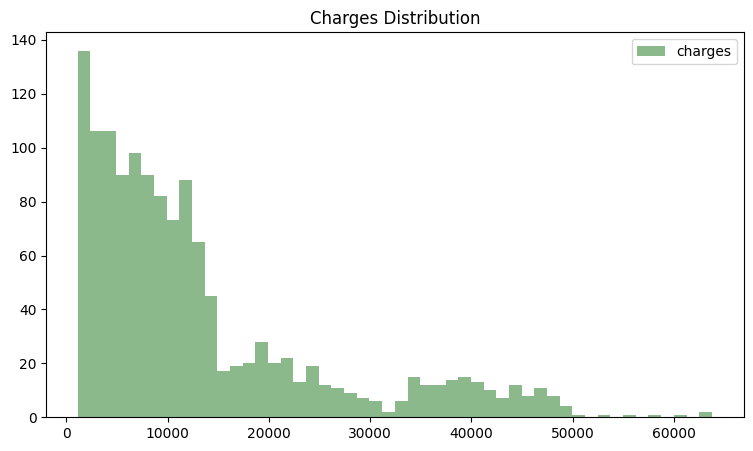

In [11]:


plt.figure(figsize = (9,5))
plt.hist(df["charges"], bins = 50
        , alpha = 0.45
        , histtype = "stepfilled"
        , color = "darkgreen"
        , edgecolor = "none"
        , label = "charges");
plt.legend()
plt.title("Charges Distribution");

In [12]:
round(df.charges.describe(), 2)

count     1338.00
mean     13270.42
std      12110.01
min       1121.87
25%       4740.29
50%       9382.03
75%      16639.91
max      63770.43
Name: charges, dtype: float64

The describe method will give us a good idea of how the charges are distributed 

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

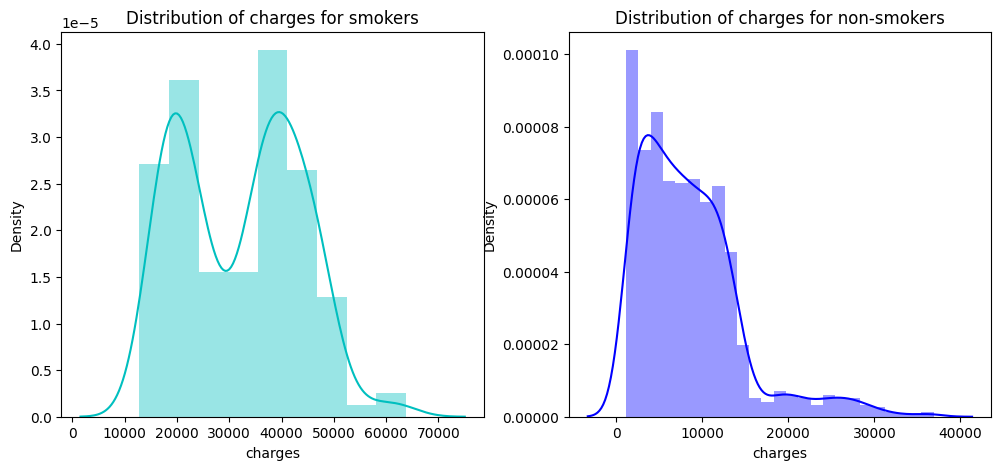

In [13]:
#Let's take a look on the distribution of charges for smokers and non-smokers 

f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

We can already see that the distribution of charges for smokers are much superior to non-smokers 

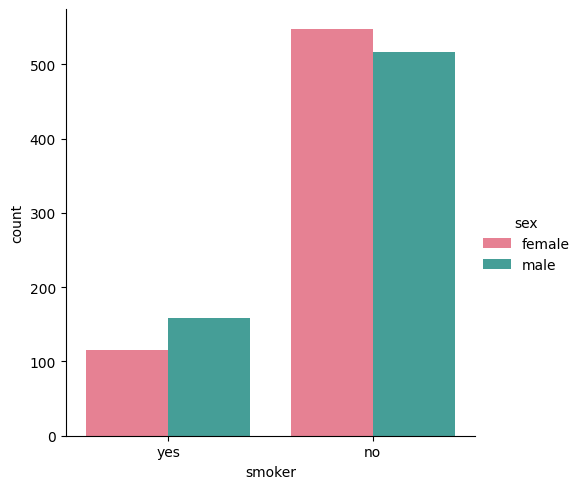

In [14]:
#Most of the smokers are men, we can assume that the average cost of treatment for a men will be higher due to the number of smokers 

sns.catplot(x="smoker", kind="count",hue = 'sex', palette="husl", data=df2)

<AxesSubplot:title={'center':'Box plot for charges of Men'}, xlabel='charges', ylabel='smoker'>

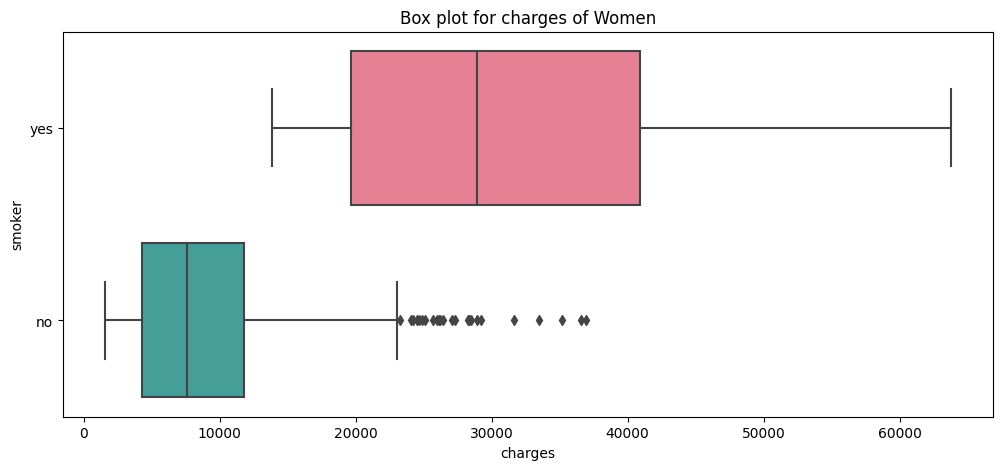

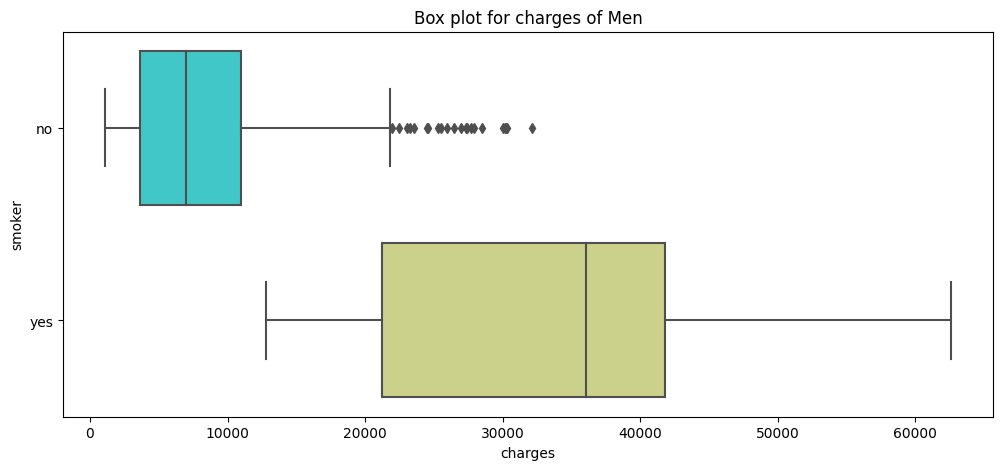

In [15]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of Women")
sns.boxplot(y="smoker", x="charges", data =  df2[(df2.sex == "female")] , orient="h", palette = 'husl')

plt.figure(figsize=(12,5))
plt.title("Box plot for charges of Men")
sns.boxplot(y="smoker", x="charges", data =  df2[(df2.sex == "male")] , orient="h", palette = 'rainbow')



This box plot shows us that the average cost of treatment for non-smokers is below $10.000, with exceptions (outliers) that might be related to punctual treatments. The average price of treatment for smokers ranges between $30.000 to $40.000. 

Note that the mean of charges for smokers is almost 3 times higher than non-smokers


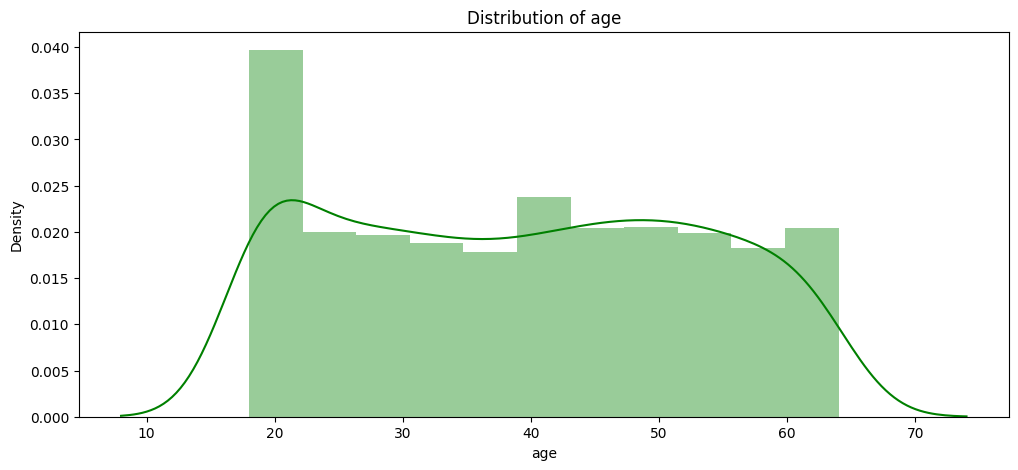

In [16]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(df2["age"], color = 'g')

Text(0.5, 0.98, 'Age vs Charges for Smokers')

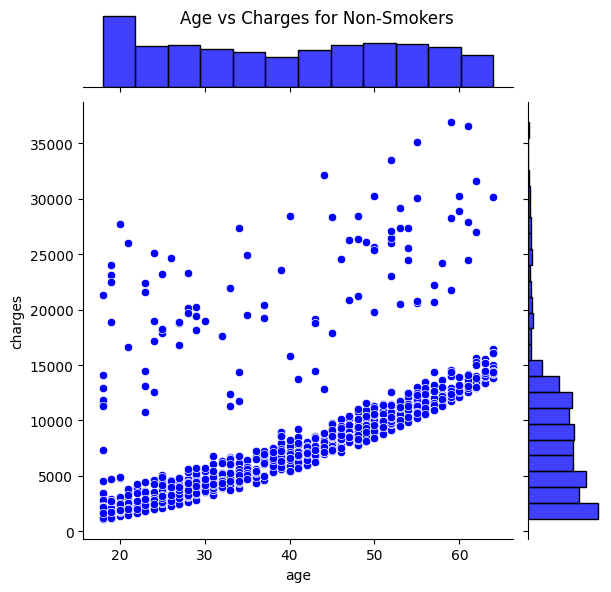

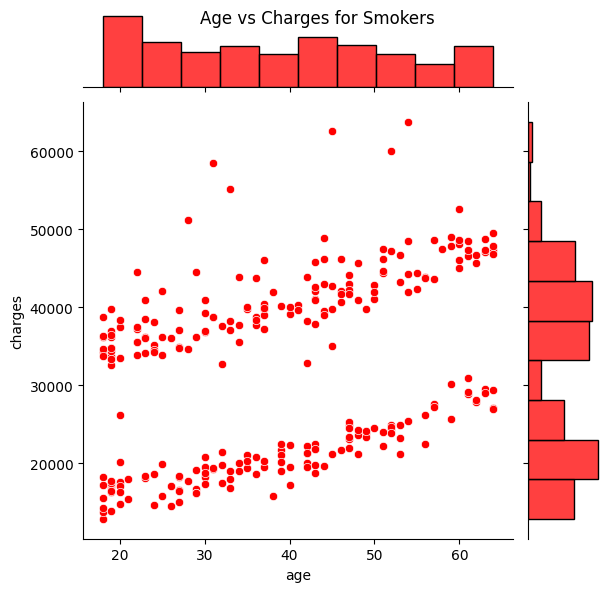

In [17]:

sns.jointplot(data=df[(df.smoker == 0)], x="age", y="charges", color = "b", ).fig.suptitle("Age vs Charges for Non-Smokers")


sns.jointplot(data=df[(df.smoker == 1)], x="age", y="charges", color = "r").fig.suptitle("Age vs Charges for Smokers")



We can notice that even for young ages, the treatment charges for smokers can be 4 times superior than non-smokers, a young smoker will spend as much as elder that is inside the normal distribution

We can see that there is a normal rise of treatment cost form non-smokers with the increase of age, the higher price of treatment for the upper band must be related to specific genetic diseases 

Now for the smokers we can suppose that smoking not only increases the price of treatments but as well can be related to developing other serious diseases  

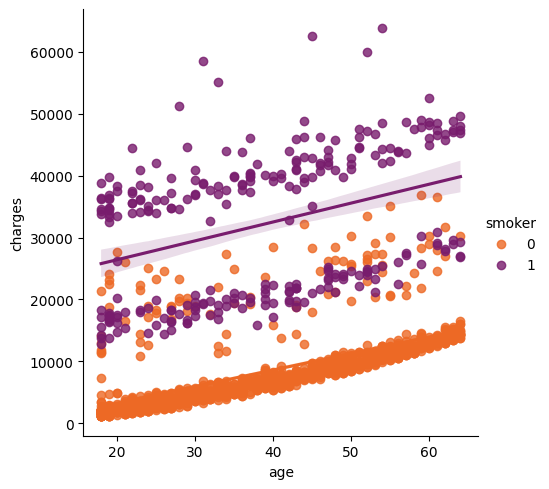

In [18]:
#Plotting both charts in one

sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'inferno_r').set_titles("Smokers and non-smokers")


Now let's explore the relation of charges with the body max index (BMI). The degree to which a person is overweight is generally described by the body mass index (BMI). 

Overweight is defined as a BMI of 25 or more, thus it includes pre-obesity defined as a BMI between 25 and 29.9 and obesity as defined by a BMI of 30 or more. (Source - Wikipedia)

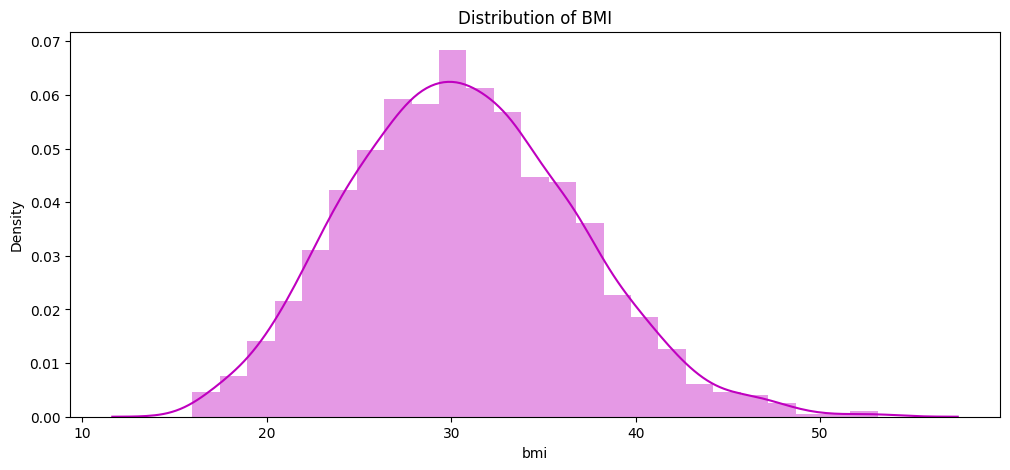

In [19]:
plt.figure(figsize=(12,5))
plt.title("Distribution of BMI")
ax = sns.distplot(df["bmi"], color = 'm')

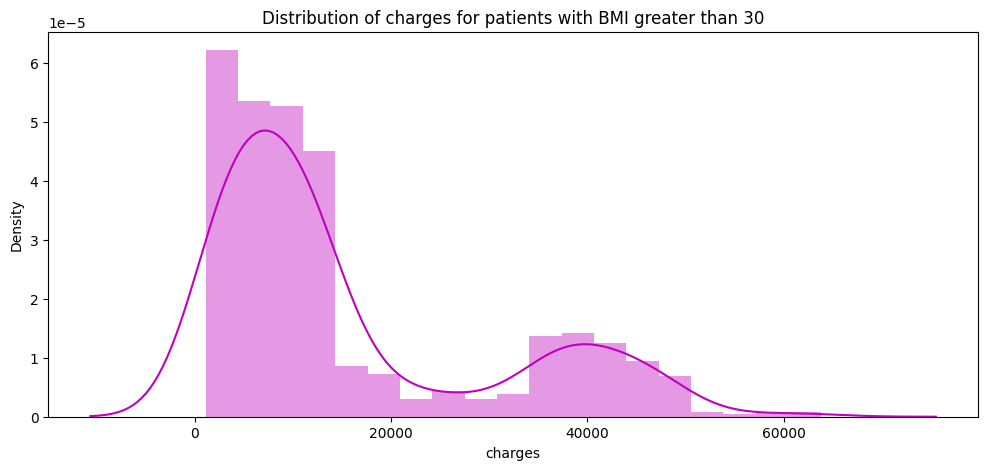

In [20]:
#BMI follow the normal distribution, a BMI over 30 indicates obesity so let's evaluate if obesity is related to higher treatment charges:

plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(df[(df.bmi >= 30)]['charges'], color = 'm')

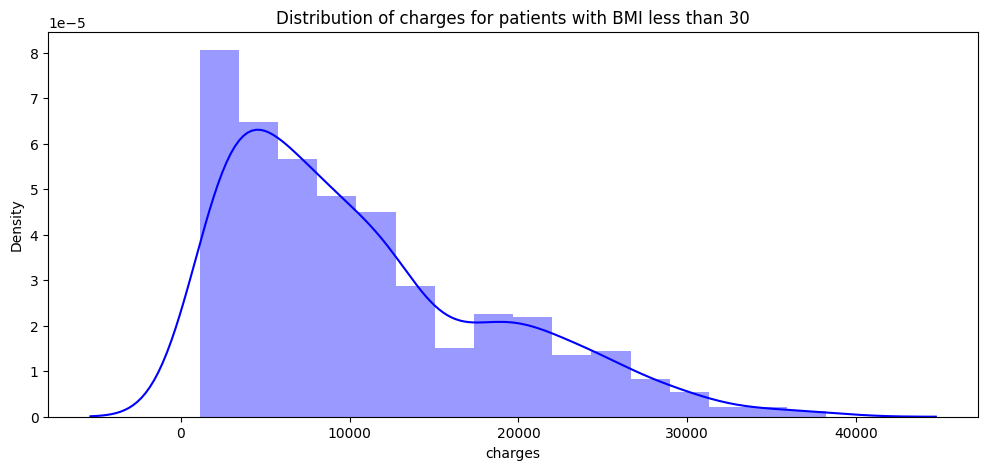

In [21]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(df[(df.bmi < 30)]['charges'], color = 'b')

Patients with BMI above 30 (overweight) have a slight increase in their treatment prices. Honestly I would expect more, but it still higher than "healthy" patients 

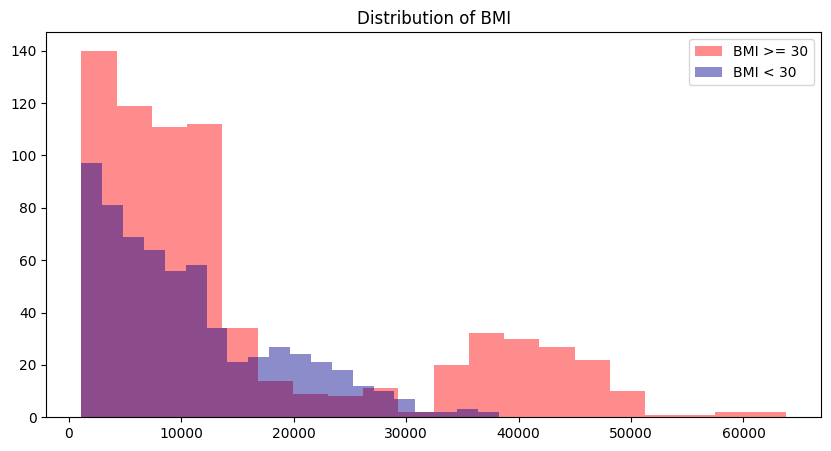

In [22]:
plt.figure(figsize = (10,5))
plt.hist(df[df["bmi"] >= 30]["charges"], bins = 20
, alpha = 0.45
, histtype = "stepfilled"
, color = "red"
, edgecolor = "none"
, label = "BMI >= 30");
plt.hist(df[df["bmi"] < 30]["charges"], bins = 20
, alpha = 0.45
, histtype = "stepfilled"
, color = "darkblue"
, edgecolor = "none"
, label = "BMI < 30");

plt.legend()
plt.title("Distribution of BMI");

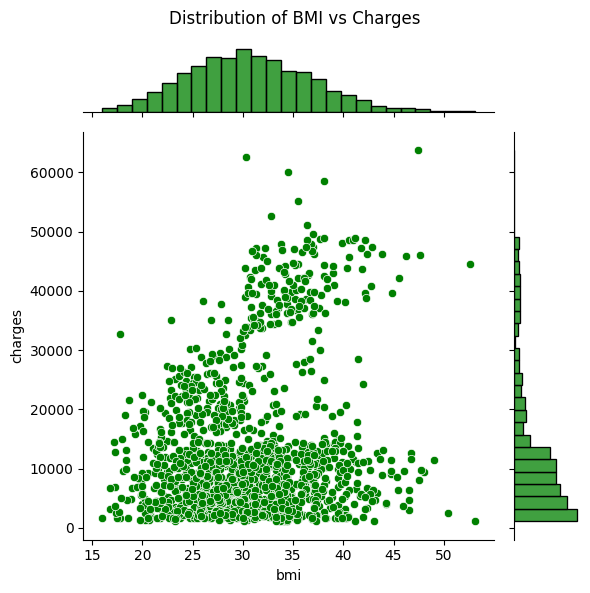

In [23]:
sns.jointplot(data=df, x="bmi", y="charges", color = "g", ).fig.suptitle("Distribution of BMI vs Charges")
plt.tight_layout()

This is the distribution of treatment cost related to the BMI, there is no clear distribution, there is a slightly increase of cost for those patients with BMI above 30, but we can not say for sure the BMI has a direct consequence in your treatment price since the vast majority of obese patients falls into the expected treatment price. 

Text(0.5, 0.98, 'BMI and Smokers vs Charges')

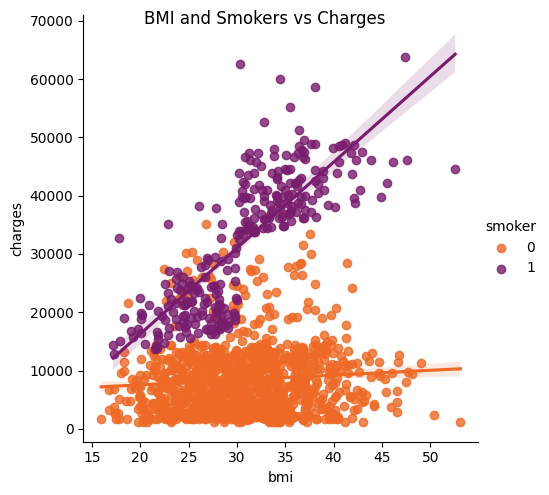

In [25]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'inferno_r').fig.suptitle("BMI and Smokers vs Charges")

Plotting the same chart as before, but now highlighting the smokers group it is even more clear that being overweight has only a slight increase in the treatment cost, but smoking and having a high BMI is what is going to bankrupt you and your health. 

The most expensive treatments are related to overweight smokers 


In [26]:
#Let's explore if we can predict the cost of treatment using a Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [79]:
#Splitting the data into train and test

x = df.drop(['charges'], axis = 1)
y = df["charges"]

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [80]:
#Predicting the values for the test and train sets

y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [109]:
# Evaluate the results 
import sklearn.metrics as metrics
from math import sqrt

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train) 
R2_train = metrics.r2_score(y_train, y_pred_train) 
RMSE_train = sqrt(metrics.mean_squared_error(y_train, y_pred_train))

print("----- Training Evaluation: Linear Regression-----")
print("MAE: ", round(MAE_train,2))
print('R2: ', round(R2_train,2))
print('RMSE: ', round(RMSE_train,2))

MAE_test = metrics.mean_absolute_error(y_test, y_pred_test) 
R2_test = metrics.r2_score(y_test, y_pred_test)
RMSE_test = sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print("")
print("----- Test Evaluation: Linear Regression-----")
print("MAE: ", round(MAE_test,2))
print('R2: ', round(R2_test,2))
print('RMSE: ', round(RMSE_test,2))

----- Training Evaluation: Linear Regression-----
MAE:  4235.38
R2:  0.74
RMSE:  6142.44

----- Test Evaluation: Linear Regression-----
MAE:  3930.33
R2:  0.8
RMSE:  5643.22


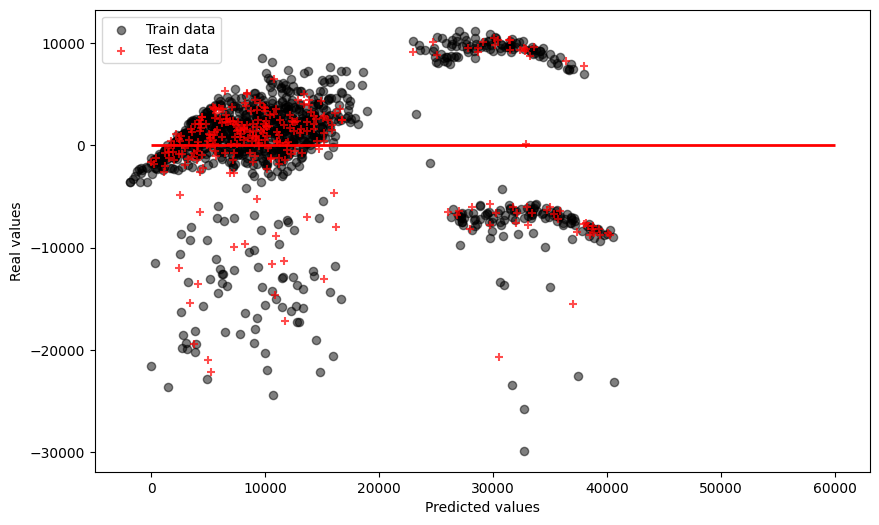

In [98]:
plt.figure(figsize=(10,6))

plt.scatter(y_pred_train,y_pred_train - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_pred_test,y_pred_test - y_test,
          c = 'red', marker = '+', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

In [99]:
#Let's see if we can implement the model with a Polynomial Feature

x2 = df.drop(["charges", "region"], axis = 1)
y2 = df["charges"]



quad = PolynomialFeatures (degree = 2)
x2_quad = quad.fit_transform(x2)

x2_train, x2_test, y2_train, y2_test = train_test_split(x2_quad, y2, random_state = 0, test_size= 0.2)

plr = LinearRegression().fit(x2_train, y2_train)

y2_pred_train = plr.predict(x2_train)
y2_pred_test = plr.predict(x2_test)



In [100]:
MAE_train2 = metrics.mean_absolute_error(y2_train, y2_pred_train) 
R2_train2 = metrics.r2_score(y2_train, y2_pred_train) 
RMSE_train2 = sqrt(metrics.mean_squared_error(y2_train, y2_pred_train))

print("----- Training Evaluation: Linear Regression after Polynomial Features-----")
print("MAE: ", round(MAE_train2,2))
print('R2: ', round(R2_train2,2))
print('RMSE: ', round(RMSE_train2,2))

MAE_test2 = metrics.mean_absolute_error(y2_test, y2_pred_test) 
R2_test2 = metrics.r2_score(y2_test, y2_pred_test)
RMSE_test2 = sqrt(metrics.mean_squared_error(y2_test, y2_pred_test))

print("")
print("----- Test Evaluation Linear: Regression after Polynomial Features-----")
print("MAE: ", round(MAE_test2,2))
print('R2: ', round(R2_test2,2))
print('RMSE: ', round(RMSE_test2,2))

----- Training Evaluation: Linear Regression after Polynomial Features-----
MAE:  2944.29
R2:  0.83
RMSE:  4892.28

----- Test Evaluation Linear: Regression after Polynomial Features-----
MAE:  2822.37
R2:  0.88
RMSE:  4354.01


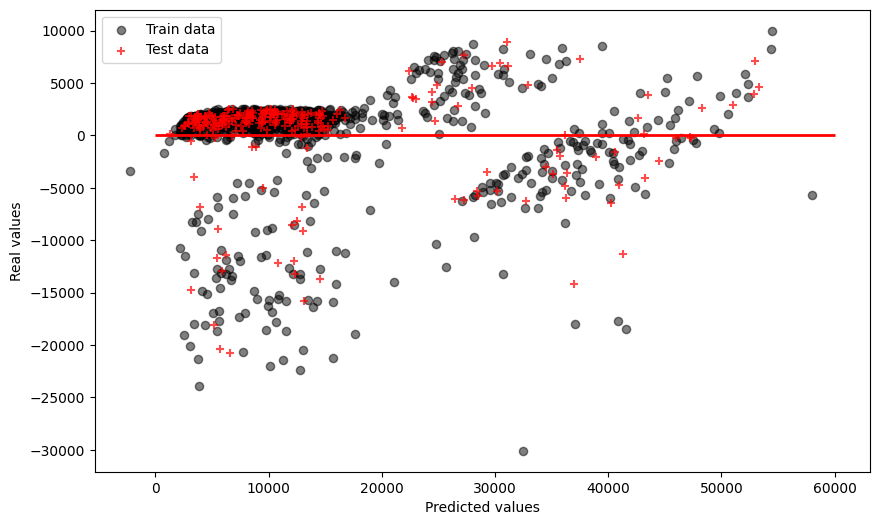

In [101]:
plt.figure(figsize=(10,6))

plt.scatter(y2_pred_train,y2_pred_train - y2_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y2_pred_test,y2_pred_test - y2_test,
          c = 'red', marker = '+', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

In [102]:
forest = RandomForestRegressor(n_estimators = 100
                              ,random_state = 0
                              ,n_jobs = -1)


forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)


In [105]:

MAE_train = metrics.mean_absolute_error(y_train, forest_train_pred) 
R2_train = metrics.r2_score(y_train, forest_train_pred) 
RMSE_train = sqrt(metrics.mean_squared_error(y_train, forest_train_pred))

print("----- Training Evaluation: Random Forest-----")
print("MAE: ", round(MAE_train,2))
print('R2: ', round(R2_train,2))
print('RMSE: ', round(RMSE_train,2))

MAE_test = metrics.mean_absolute_error(y_test, forest_test_pred) 
R2_test = metrics.r2_score(y_test, forest_test_pred)
RMSE_test = sqrt(metrics.mean_squared_error(y_test, forest_test_pred))

print("")
print("----- Test Evaluation: Random Forest-----")
print("MAE: ", round(MAE_test,2))
print('R2: ', round(R2_test,2))
print('RMSE: ', round(RMSE_test,2))

----- Training Evaluation: Random Forest-----
MAE:  1053.3
R2:  0.97
RMSE:  1943.81

----- Test Evaluation: Random Forest-----
MAE:  2686.55
R2:  0.87
RMSE:  4534.53


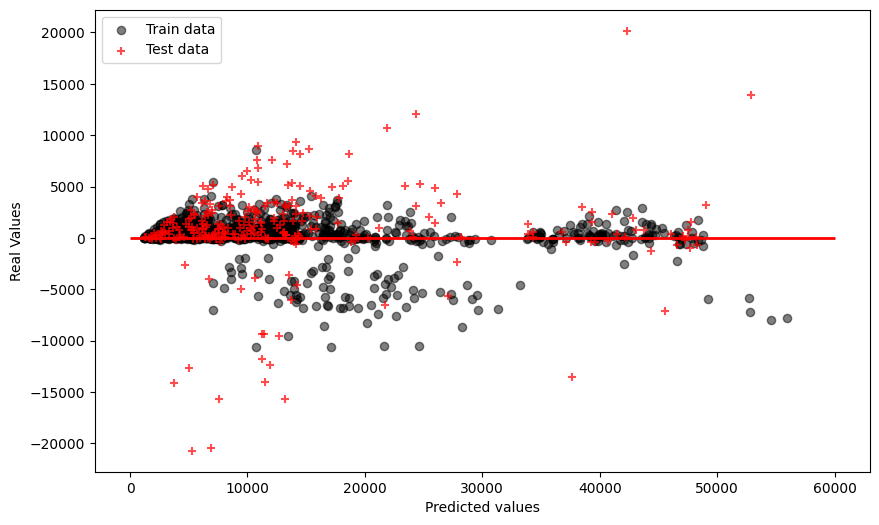

In [104]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'red', marker = '+', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Real Values')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()